In [1]:
from pydataxm import *                          
import datetime as dt
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
#show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

objetoAPI = pydataxm.ReadDB()  

df = objetoAPI.get_collections()
#filter where Entity is 'Recurso'
df = df[df['Entity'] == 'Recurso']

df

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
8,ConsCombustibleMBTU,Consumo Combustible MBTU por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,MBTU,Los generadores térmicos deben reportar diaria...
9,Gene,Generación por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generacion neta de cada una de las plantas Nac...
10,IndRecMargina,Indicador Recurso Margina por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,#,Si Precio de Oferta Declarado = Máximo Precio ...
12,PrecOferDesp,Precio de Oferta de Despacho por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,COP/kWh,Es el precio de la energia de un recurso de ge...
20,GeneIdea,Generación Ideal por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Despacho de generacion que resulta de consider...
25,EmisionesCO2Eq,Emisiones de CO2 Eq por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,gCO2e/kWh,Emisiones totales de Dióxido de Carbono. Para ...
34,GeneSeguridad,Generación de Seguridad por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generación que se requiere para garantizar con...
35,GeneFueraMerito,Generación Fuera de Mérito por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generación forzada requerida para suplir las R...
37,GeneProgDesp,Generación Programada por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Despacho de generacion esperado de las central...
38,GeneProgRedesp,Generación Programada Redespacho por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generación programada del redespacho


In [2]:
# All production units in the system
objetoAPI.get_collections('Gene')
df_gene = objetoAPI.request_data('Gene',
                                 'Recurso',
                                 dt.date(2018, 1, 1),
                                 dt.date(2018, 1, 31))
# show all possible valus in 'Values_code' column
# print(df_gene['Values_code'].unique())
guaviomayor = df_gene[df_gene['Values_code'] == 'GVIO']
guaviomenor = df_gene[df_gene['Values_code'] == '2S8N']

Guavio_menor = "2S8N"
Guavio_mayor = "GVIO"
i = "guaviomenor"
guaviomenor = guaviomenor.drop(columns=['Id', 'Values_code'])
melted_df = pd.melt(guaviomenor, id_vars=['Date'], value_vars=[
                    f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
melted_df[i] = melted_df[i].apply(lambda x: f'{x:.2f}')
melted_df[i] = melted_df[i].astype(float)
melted_df['Timestamp'] = pd.to_datetime(melted_df['Date']) + pd.to_timedelta(
melted_df['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
melted_df.drop(columns=['Date', 'Hour'], inplace=True)
melted_df.set_index('Timestamp', inplace=True)
melted_df.sort_index(inplace=True)
melted_df.head()

AttributeError: 'DataFrame' object has no attribute 'append'

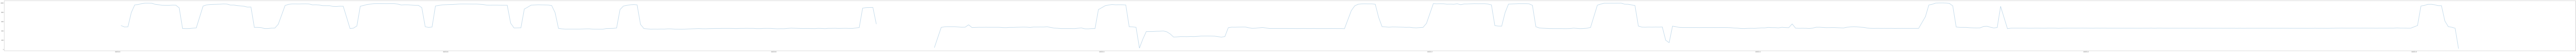

In [81]:
plt.plot(melted_df.index, melted_df['guaviomenor'])

# Getting data from Listado_Recursos_Generacion.xlsx

In [83]:
df_generation_plants = pd.read_excel('Listado_Recursos_Generacion.xlsx',skiprows=3)
df_hydro_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='HIDRAULICA']
df_solar_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='SOLAR']
df_wind_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='EOLICA']
df_thermal_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='TERMICA']
df_cogen_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='COGENERADOR']

print("Solar capacity(MW): ", df_solar_plants['Capacidad Efectiva Neta [MW]'].sum())
print("Wind capacity(MW): ", df_wind_plants['Capacidad Efectiva Neta [MW]'].sum())
print("Hydro capacity(MW): ", df_hydro_plants['Capacidad Efectiva Neta [MW]'].sum())
print("Thermal capacity(MW): ", df_thermal_plants['Capacidad Efectiva Neta [MW]'].sum())
print("Cogen plants(MW):  ", df_cogen_plants['Capacidad Efectiva Neta [MW]'].sum())
print("Total capacity(MW): ", df_generation_plants['Capacidad Efectiva Neta [MW]'].sum())

plants = {}
for i in range(len(df_generation_plants)):
    plants[df_generation_plants['Código SIC'][i]] = df_generation_plants['Nombre Recurso'][i]
print(plants.keys())
print(list(plants.keys())[0])
print(plants.values())


Solar capacity(MW):  773.4959499999999
Wind capacity(MW):  50.32
Hydro capacity(MW):  13225.557
Thermal capacity(MW):  6400.7300000000005
Cogen plants(MW):   229.20000000000002
Total capacity(MW):  20679.302949999998
dict_keys(['3C3X', '3AXV', '3AL6', '2YQO', '2YWY', '2YB9', '2XXR', '2Y2T', '2XXX', 'TYP5', 'TYP4', 'TYP3', '2WFN', '2W4Y', '2V27', '2U91', '2U8Y', '2U93', 'GE32', '2U5P', '2S9Q', '2S8S', '2S8I', '2S6Q', 'UNIB', '2S6S', '2V25', 'ARG1', 'TMB1', 'TSJ2', 'PRF1', 'GEC3', 'CTM1', 'CTM2', 'CIMR', 'TCD2', 'TCD1', 'TPD1', 'PPA4', 'MRL1', 'TDR1', 'ZPA5', 'ZPA4', 'ZPA3', 'ZPA2', 'TSJ1', 'PRG2', 'PRG1', 'PLQ3', 'PPA3', 'PPA2', 'PPA1', 'TGJ2', 'TGJ1', 'VLL1', 'TBU3', 'TBU2', 'TBU1', 'RMAR', 'PLQ4', 'LNN4', 'LNN3', 'LNN2', 'LNN1', 'ERO8', 'ERO7', 'CTG3', 'CTG2', 'CTG1', 'TBQ4', 'TBQ3', 'TYP1', 'TYP2', 'BRN3', 'BRN2', 'BRN1', 'ERO6', 'ERO5', 'ERO4', 'ERO3', 'ERO2', 'ERO1', 'BLL2', 'BLL1', '3HWK', '3HG9', '3HG7', '3HF5', '3HDE', '3HYG', '3HF7', '3HLD', '3HF9', '3HWM', '3HE8', '3GVM', '3GV

In [88]:
# 60 months Guavio
df_combined_sistema = pd.DataFrame()
variables_guavio = ['2S8N', 'GVIO']
change_variable = False
complete_df = pd.DataFrame()
for i in variables_guavio:
    df_combined_sistema = pd.DataFrame()
    months = 60
    start_date = dt.datetime(2018, 1, 1)
    start_list = [start_date + relativedelta(months=i) for i in range(0, months)] 
    end_list = [start_date + relativedelta(months=i+1, days=-1) for i in range(0, months)]
    for index, start in enumerate(start_list):
        # print(index)
        print("Done months:    ,", index, " of ", len(start_list))
        index_of_value = variables_guavio.index(i)
        print("Done variables:    ,", index_of_value, " of ", len(variables_guavio))
        start_date = start_list[index]
        end_date = end_list[index]

        df =objetoAPI.get_collections(i) 

        print('-------------------')

        df_plant = objetoAPI.request_data(
                    "Gene",           
                    "Recurso",             
                    start_date.date(),  
                    end_date.date())
        #keep values where Value_code is equal to i
        df_plant = df_plant[df_plant['Values_code'] == i]
        df_plant = df_plant.drop(columns = ['Id','Values_code'])
        melted_df = pd.melt(df_plant, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        melted_df[i] = melted_df[i].apply(lambda x: f'{x:.2f}')
        melted_df[i] = melted_df[i].astype(float)
        melted_df['Timestamp'] = pd.to_datetime(melted_df['Date']) + pd.to_timedelta(melted_df['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        melted_df.drop(columns=['Date', 'Hour'], inplace=True)

        df_combined_sistema = pd.concat([df_combined_sistema, melted_df], ignore_index=True)
        df_combined_sistema.sort_values(by=['Timestamp'], inplace=True)
        # df_combined_sistema.set_index('Timestamp', inplace=True)
    # print(df_combined_sistema.describe())
    if change_variable == False:
        complete_df = df_combined_sistema
        change_variable = True
        # print(complete_df.head())
    else:
        #only keep the values of complete_df that are in df_combined_sistema
        complete_df = complete_df[complete_df.index.isin(df_combined_sistema.index)]
        try:
            # complete_df = pd.concat([complete_df, df_combined_sistema], axis=1)
            complete_df = pd.merge(complete_df, df_combined_sistema, on='Timestamp', how='outer')
            # print(complete_df.tail())
        except Exception as e:
            print("!!!!!!!")
            print(e)
            print("!!!!!!!")
complete_df.sort_values(by=['Timestamp'], inplace=True)
complete_df.set_index('Timestamp', inplace=True)

#change complete_df column names to the ones in var_names
complete_df.rename(columns=plants, inplace=True)
complete_df.head()


Done months:    , 0  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 1  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 2  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 3  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 4  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 5  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 6  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 7  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 8  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 9  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 10  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 11  of  60
Done variables:    , 0  of  2
-------------------
Done months:    , 12  of  60
Done variables:    , 0  of  2
---

,GUAVIO MENOR,GUAVIO
Timestamp,,
2018-01-01 01:00:00,5159.0,579951.0
2018-01-01 02:00:00,4849.0,513033.0
2018-01-01 03:00:00,4886.0,382011.0
2018-01-01 04:00:00,7971.0,224678.0
2018-01-01 05:00:00,9599.0,9540.0


In [90]:
complete_df.describe()

,GUAVIO MENOR,GUAVIO
count,32890.000000,3.257400e+04
mean,5579.756352,7.289105e+05
std,2485.009426,3.974150e+05
min,0.010000,6.000000e-02
25%,4627.895000,3.552658e+05
50%,4938.470000,8.473965e+05
75%,5316.560000,1.008049e+06
max,10727.150000,1.256001e+06
